# INISIALISASI

In [16]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# DATA

In [17]:
data = pd.read_csv("Datasetsong.csv")
judul_lagu = data['Title'].tolist()
artis = data['Artist'].tolist()

Masukkan judul lagu atau nama artis yang ingin dicari (atau ketik 'exit' untuk keluar): Bad Boy

Hasil pencarian untuk 'Bad Boy':
Judul: Bad Boy, Artis: Red Velvet
Waktu eksekusi Rekursif: 0.062719 detik
Waktu eksekusi Iteratif: 0.000427 detik
Masukkan judul lagu atau nama artis yang ingin dicari (atau ketik 'exit' untuk keluar): Bawa Dia Kembali

Hasil pencarian untuk 'Bawa Dia Kembali':
Judul: Bawa Dia Kembali, Artis: Mahalini
Waktu eksekusi Rekursif: 0.090842 detik
Waktu eksekusi Iteratif: 0.000477 detik
Masukkan judul lagu atau nama artis yang ingin dicari (atau ketik 'exit' untuk keluar): Duka

Hasil pencarian untuk 'Duka':
Judul: Duka, Artis: Last Child
Waktu eksekusi Rekursif: 0.019607 detik
Waktu eksekusi Iteratif: 0.000176 detik
Masukkan judul lagu atau nama artis yang ingin dicari (atau ketik 'exit' untuk keluar): exit

=== Semua Hasil Waktu Eksekusi ===
+------------------+--------------------------+--------------------------+
| Input Dicari     |   Waktu Rekursif (detik) | 

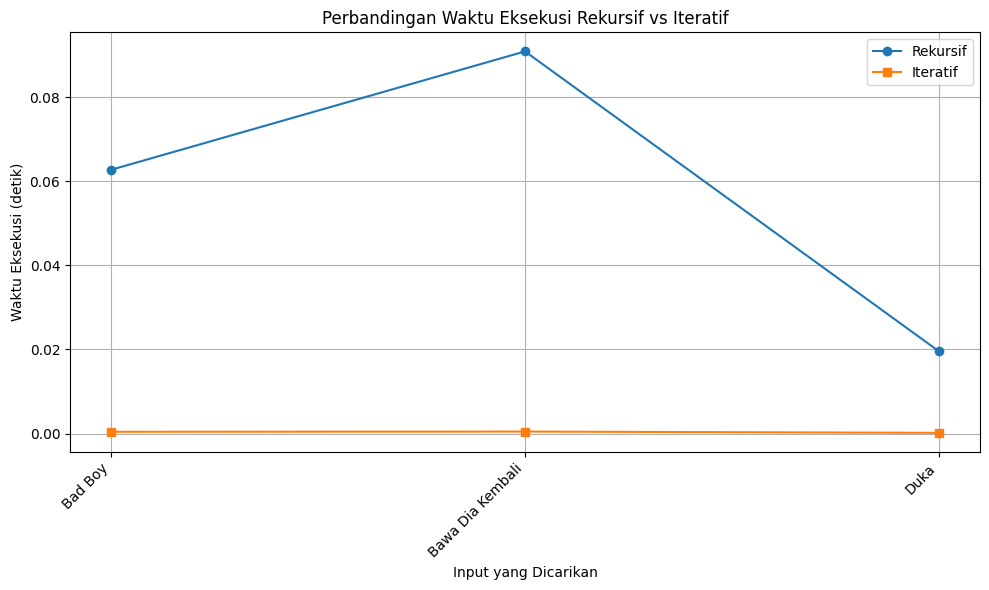

In [18]:
def tambah_beban_komputasi(panjang_cari):
    for _ in range(panjang_cari * 1000):
        pass

def cari_lagu_rekursif(judul_lagu, artis, input_cari, panjang_cari, hasil=None):
    tambah_beban_komputasi(len(input_cari))
    if hasil is None:
        hasil = []
    if not judul_lagu:
        return hasil
    if (len(judul_lagu[0]) == panjang_cari and judul_lagu[0].lower() == input_cari.lower()) or (artis[0].lower() == input_cari.lower()):
        hasil.append((judul_lagu[0], artis[0]))
    return cari_lagu_rekursif(judul_lagu[1:], artis[1:], input_cari, panjang_cari, hasil)

def cari_lagu_iteratif(judul_lagu, artis, input_cari, panjang_cari):
    tambah_beban_komputasi(len(input_cari))
    hasil = []
    for i in range(len(judul_lagu)):
        if (len(judul_lagu[i]) == panjang_cari and judul_lagu[i].lower() == input_cari.lower()) or (artis[i].lower() == input_cari.lower()):
            hasil.append((judul_lagu[i], artis[i]))
    return hasil

def ukur_waktu(fungsi, *args):
    mulai = time.time()
    hasil = fungsi(*args)
    selesai = time.time()
    return hasil, selesai - mulai

rekursif_times = []
iteratif_times = []
input_yang_dicari = []

while True:
    input_cari = input("Masukkan judul lagu atau nama artis yang ingin dicari (atau ketik 'exit' untuk keluar): ").strip()

    if input_cari.lower() == 'exit':
        break

    panjang_cari = len(input_cari)

    hasil_rekursif, waktu_rekursif = ukur_waktu(cari_lagu_rekursif, judul_lagu, artis, input_cari, panjang_cari)
    hasil_iteratif, waktu_iteratif = ukur_waktu(cari_lagu_iteratif, judul_lagu, artis, input_cari, panjang_cari)

    if hasil_iteratif:
        rekursif_times.append(waktu_rekursif)
        iteratif_times.append(waktu_iteratif)
        input_yang_dicari.append(input_cari)

        print(f"\nHasil pencarian untuk '{input_cari}':")
        for lagu, penyanyi in hasil_iteratif:
            print(f"Judul: {lagu}, Artis: {penyanyi}")
    else:
        print(f"\nTidak ditemukan hasil untuk '{input_cari}' di dataset.")

    print(f"Waktu eksekusi Rekursif: {waktu_rekursif:.6f} detik")
    print(f"Waktu eksekusi Iteratif: {waktu_iteratif:.6f} detik")

print("\n=== Semua Hasil Waktu Eksekusi ===")
data_tabel = pd.DataFrame({
    'Input Dicari': input_yang_dicari,
    'Waktu Rekursif (detik)': rekursif_times,
    'Waktu Iteratif (detik)': iteratif_times
})

print(tabulate(data_tabel, headers='keys', tablefmt='grid', showindex=False))

plt.figure(figsize=(10, 6))
plt.title("Perbandingan Waktu Eksekusi Rekursif vs Iteratif")
plt.xlabel("Input yang Dicarikan")
plt.ylabel("Waktu Eksekusi (detik)")
plt.grid(True)

plt.plot(input_yang_dicari, rekursif_times, label="Rekursif", marker="o")
plt.plot(input_yang_dicari, iteratif_times, label="Iteratif", marker="s")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
